# White Box - Supervised ML Project
__Name:__ Abdulrahman Mohamed Abdulla 

__Topic Name:__ Regression Topic or Classification Topic

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
A large global finance bank would like to improve the process of credit risk scoring their customers to eliminate employee biases, human error and standardize the process while improving efficiency. The approach is to build an explainable (white box) machine learning model to replace the current credit scoring system.The output is expected to be explained to a non-technical audience.

### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('train.csv')
df = dataset

In [3]:
display(df.shape)
display(df.info())
display(df.describe())

(100000, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df = dataset.drop(['ID','Month', 'Customer_ID' ,'Name', 'Type_of_Loan','SSN','Credit_History_Age','Num_of_Delayed_Payment'], axis=1)

In [6]:
df['Credit_Score']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [7]:
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


In [9]:
# Switch it to numeric
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df.dropna(subset=['Monthly_Balance'], inplace=True)

In [10]:
# Switch Annual income to Float
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('', np.nan)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [11]:
# Round the values to 2
df['Monthly_Balance'] = df['Monthly_Balance'].round(2)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(2)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(2)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].round(2)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].round(2)

In [12]:
median_val = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_val, inplace=True)

In [13]:
# Switch To numeric values for these columns
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df = df.dropna(subset=['Num_of_Loan'])

In [14]:
df['Annual_Income'].describe()

count    8.750100e+04
mean     1.764293e+05
std      1.429678e+06
min      7.005930e+03
25%      1.930321e+04
50%      3.691896e+04
75%      7.209914e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [15]:
df = df[df['Annual_Income'] <= 200000]

In [16]:
df['Annual_Income'].describe()

count     86614.000000
mean      49973.045596
std       38048.847027
min        7005.930000
25%       19234.690000
50%       36607.630000
75%       70973.320000
max      179987.280000
Name: Annual_Income, dtype: float64

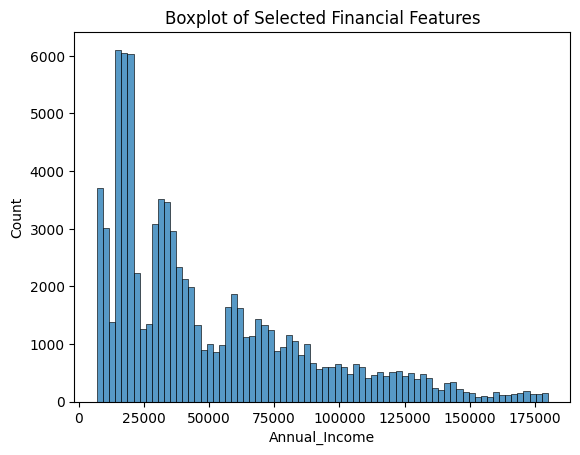

In [17]:
sns.histplot(data=df['Annual_Income'])
plt.title("Boxplot of Selected Financial Features")
plt.show()

In [18]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    31723
Good        21080
_           17598
Bad         16213
Name: count, dtype: int64

In [19]:
# Remove the _ output from this column & drop missing values
df['Credit_Mix'] = df[df['Credit_Mix'] != '_']['Credit_Mix']
df = df.dropna(subset=['Credit_Mix'])

In [20]:
Credit_Mix_Num= {'Standard': 3,'Good': 2, 'Bad': 1 }
df['Credit_Mix_Num'] = df['Credit_Mix'].replace(Credit_Mix_Num)

In [21]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    31723
Good        21080
Bad         16213
Name: count, dtype: int64

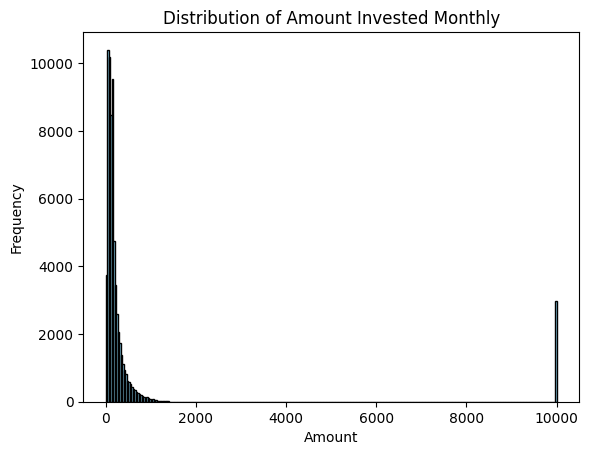

In [22]:
plt.hist(df['Amount_invested_monthly'].dropna(), bins=300, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount Invested Monthly')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Fill missing values in Amount Invested
median_val = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_val, inplace=True)

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

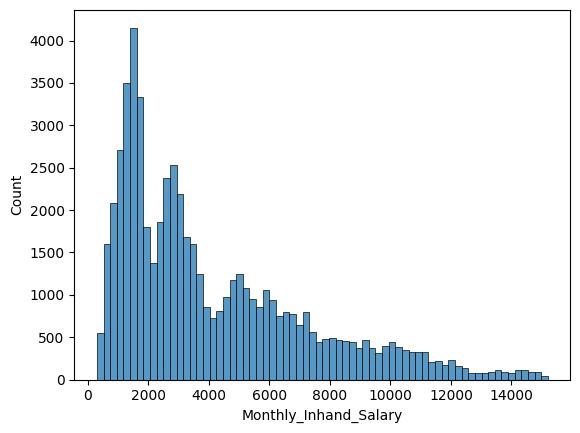

In [24]:
sns.histplot(data = df , x = 'Monthly_Inhand_Salary')

In [25]:
df['Monthly_Inhand_Salary'].describe()

count    58593.000000
mean      4161.872931
std       3167.810497
min        303.650000
25%       1620.630000
50%       3062.180000
75%       5917.510000
max      15204.630000
Name: Monthly_Inhand_Salary, dtype: float64

In [26]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

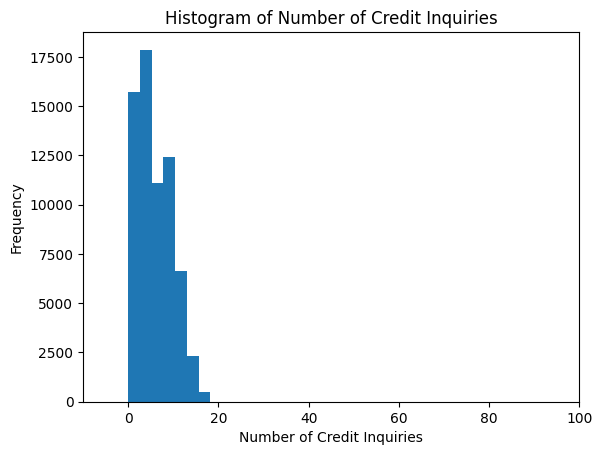

In [27]:
df['Num_Credit_Inquiries'].dropna().plot(kind='hist', bins=1000)
plt.title('Histogram of Number of Credit Inquiries')
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Frequency')
plt.xlim(-10, 100)
plt.show()

In [28]:
df['Num_Credit_Inquiries'].describe()

count    67673.000000
mean        27.134707
std        190.120731
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [29]:
df = df[df['Num_Credit_Inquiries'] <= 100]

In [30]:
df['Num_Credit_Inquiries'].describe()

count    66597.000000
mean         5.797874
std          4.048367
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         93.000000
Name: Num_Credit_Inquiries, dtype: float64

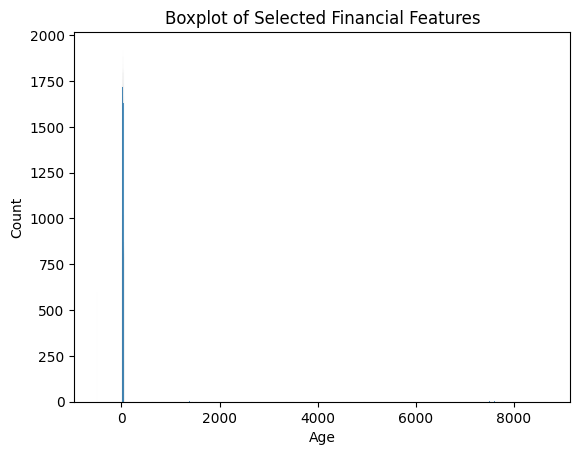

In [31]:
sns.histplot(data=df['Age'])
plt.title("Boxplot of Selected Financial Features")
plt.show()

In [32]:
df['Age'].describe()

count    63270.000000
mean       112.856472
std        699.177186
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [33]:
df = df[df['Age'] <= 100]
df = df[df['Age'] >= 18]

In [34]:
df['Age'].describe()

count    57818.000000
mean        34.428690
std         10.108287
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max        100.000000
Name: Age, dtype: float64

<Axes: xlabel='Changed_Credit_Limit', ylabel='Count'>

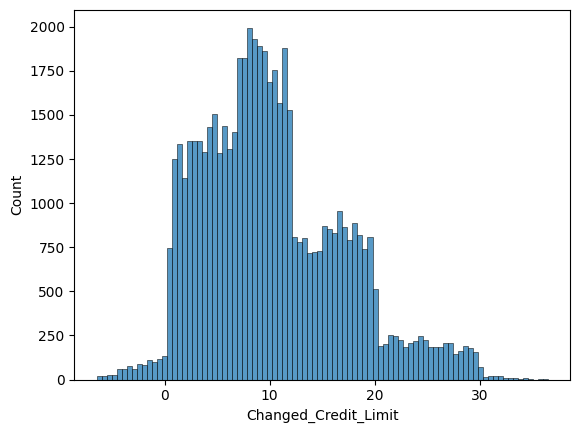

In [35]:
sns.histplot(data=df, x='Changed_Credit_Limit')

In [36]:
# Fill Credit limit with median
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())

In [37]:
# Payment of min Amount
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    28920
No     21955
NM      6943
Name: count, dtype: int64

In [38]:
df['Payment_of_Min_Amount'].replace('NM' ,'No' , inplace=True)
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    28920
No     28898
Name: count, dtype: int64

In [39]:
df['Payment_of_Min_Amount'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(int)

In [40]:
# Credit Scoring
df['Credit_Score'].value_counts()
df['Credit_Score'].replace({'Good': 3, 'Standard': 2, 'Poor': 1}, inplace=True)

In [41]:
df['Credit_Score'] = df['Credit_Score'].astype('int')
df['Credit_Score'].value_counts()

Credit_Score
2    30857
1    16190
3    10771
Name: count, dtype: int64

In [42]:
# Credit Mix
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    26308
Good        18729
Bad         12781
Name: count, dtype: int64

In [43]:
df['Credit_Mix'].replace({'Good': 3, 'Standard': 2, 'Bad': 1}, inplace=True)
df['Credit_Mix'] = df['Credit_Mix'].astype('int')

In [44]:
df['Credit_Mix'].value_counts()

Credit_Mix
2    26308
3    18729
1    12781
Name: count, dtype: int64

In [45]:
# Payment Behaviour
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      14168
High_spent_Medium_value_payments    10398
High_spent_Large_value_payments      8181
Low_spent_Medium_value_payments      8004
High_spent_Small_value_payments      6583
Low_spent_Large_value_payments       6116
!@9#%8                               4368
Name: count, dtype: int64

In [46]:
df = df[df['Payment_Behaviour'] != '!@9#%8']
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      14168
High_spent_Medium_value_payments    10398
High_spent_Large_value_payments      8181
Low_spent_Medium_value_payments      8004
High_spent_Small_value_payments      6583
Low_spent_Large_value_payments       6116
Name: count, dtype: int64

In [47]:
df['Occupation'].value_counts()

Occupation
_______          3820
Lawyer           3584
Engineer         3417
Architect        3414
Accountant       3391
Scientist        3382
Mechanic         3353
Developer        3339
Teacher          3324
Journalist       3297
Media_Manager    3291
Entrepreneur     3243
Musician         3182
Doctor           3174
Manager          3156
Writer           3083
Name: count, dtype: int64

In [48]:
df = df[df['Occupation'] != '_______']
df['Occupation'].value_counts()

Occupation
Lawyer           3584
Engineer         3417
Architect        3414
Accountant       3391
Scientist        3382
Mechanic         3353
Developer        3339
Teacher          3324
Journalist       3297
Media_Manager    3291
Entrepreneur     3243
Musician         3182
Doctor           3174
Manager          3156
Writer           3083
Name: count, dtype: int64

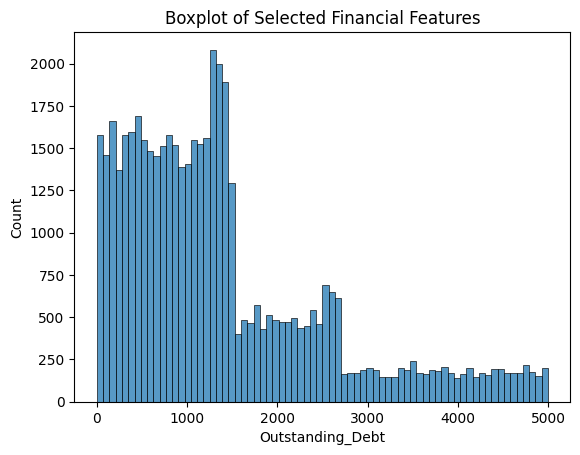

In [49]:
sns.histplot(data=df['Outstanding_Debt'])
plt.title("Boxplot of Selected Financial Features")
plt.show()

In [50]:
df['Outstanding_Debt'].describe()

count    49137.000000
mean      1383.198015
std       1139.651017
min          0.230000
25%        548.320000
50%       1123.010000
75%       1834.980000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

In [51]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(1197.23)

In [52]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix_Num'],
      dtype='object')

<Axes: >

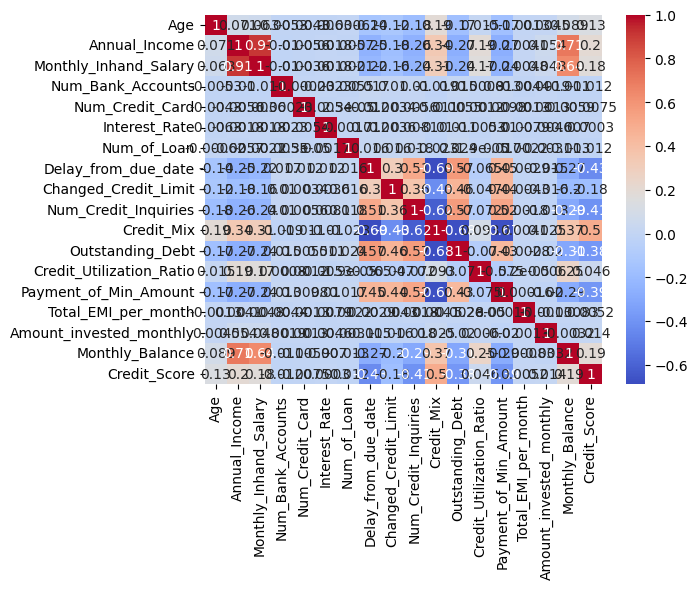

In [53]:
df_corr = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']].corr()
sns.heatmap(df_corr , annot=True , cmap='coolwarm')

In [54]:
df_corr[df_corr > 0.8]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,NaN,1.000000,0.907672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,0.907672,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Credit_Card,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest_Rate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Loan,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Changed_Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Credit_Inquiries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_corr[df_corr < -0.7]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Credit_Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest_Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Changed_Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Credit_Inquiries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df['Annual_Income'].describe()

count     49630.000000
mean      50956.984550
std       38541.247388
min        7006.035000
25%       19493.545000
50%       37263.450000
75%       72626.420000
max      179987.280000
Name: Annual_Income, dtype: float64

In [57]:
df['Monthly_Inhand_Salary'].describe()

count    49630.000000
mean      4050.761915
std       2978.169182
min        303.650000
25%       1811.360000
50%       3062.180000
75%       5442.900000
max      15204.630000
Name: Monthly_Inhand_Salary, dtype: float64

In [58]:
df.drop(columns='Annual_Income', inplace = True)

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [59]:
df.dtypes

Age                         float64
Occupation                   object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
Credit_Mix_Num                int64
dtype: object

In [60]:
df_dummies = pd.get_dummies(df, columns=['Occupation', 'Payment_Behaviour'])

In [61]:
df_dummies

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
1,23.0,3062.18,3,4,3,4.0,-1,11.27,4.0,3,...,False,True,False,False,False,False,False,True,False,False
3,23.0,3062.18,3,4,3,4.0,5,6.27,4.0,3,...,False,True,False,False,False,False,False,False,False,True
4,23.0,1824.84,3,4,3,4.0,6,11.27,4.0,3,...,False,True,False,False,False,True,False,False,False,False
6,23.0,1824.84,3,4,3,4.0,3,11.27,4.0,3,...,False,True,False,False,False,False,False,False,False,True
7,23.0,1824.84,3,4,3,4.0,3,11.27,4.0,3,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,28.0,1929.91,10,8,29,5.0,33,18.31,9.0,1,...,False,False,False,False,False,False,False,False,False,True
99990,28.0,1929.91,10,8,29,5.0,33,18.31,9.0,1,...,False,False,False,False,False,False,False,True,False,False
99991,29.0,1929.91,10,8,29,5.0,33,18.31,9.0,1,...,False,False,False,False,True,False,False,False,False,False
99997,25.0,3359.42,4,6,5729,2.0,27,11.50,3.0,3,...,False,False,False,False,True,False,False,False,False,False


## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [62]:
# Define features and target
X = df_dummies.drop('Credit_Score', axis=1)
y = df_dummies['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [64]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Step 6: Evaluate
print("Training Performance:")
print(classification_report(y_train, y_pred_train))
print("Test Performance:")
print(classification_report(y_test, y_pred_test))

Training Performance:
              precision    recall  f1-score   support

           1       0.65      0.46      0.54     11151
           2       0.70      0.69      0.70     21147
           3       0.51      0.75      0.61      7406

    accuracy                           0.64     39704
   macro avg       0.62      0.64      0.62     39704
weighted avg       0.65      0.64      0.64     39704

Test Performance:
              precision    recall  f1-score   support

           1       0.64      0.45      0.53      2748
           2       0.70      0.69      0.70      5337
           3       0.50      0.74      0.60      1841

    accuracy                           0.63      9926
   macro avg       0.61      0.63      0.61      9926
weighted avg       0.65      0.63      0.63      9926



In [65]:
# Logistic for whole data 
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.29      0.38     13899
           2       0.55      0.87      0.67     26484
           3       0.35      0.02      0.04      9247

    accuracy                           0.55     49630
   macro avg       0.48      0.39      0.36     49630
weighted avg       0.51      0.55      0.47     49630



### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [67]:
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['distance'],
    'knn__metric': ['euclidean']
}

In [68]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__metric': ['euclidean'], 'knn__n_neighbors': [1, 2, ...], 'knn__weights': ['distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [69]:
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='euclidean'))
])
pipeline2.fit(X_train, y_train)

y_pred_train2 = pipeline2.predict(X_train)
y_pred_test2 = pipeline2.predict(X_test)

print("Training Performance:")
print(classification_report(y_train, y_pred_train2))

print("Test Performance:")
print(classification_report(y_test, y_pred_test2))

Training Performance:
              precision    recall  f1-score   support

           1       0.71      0.59      0.64     11151
           2       0.72      0.79      0.75     21147
           3       0.60      0.59      0.59      7406

    accuracy                           0.70     39704
   macro avg       0.68      0.66      0.66     39704
weighted avg       0.70      0.70      0.69     39704

Test Performance:
              precision    recall  f1-score   support

           1       0.65      0.52      0.58      2748
           2       0.68      0.75      0.71      5337
           3       0.51      0.50      0.51      1841

    accuracy                           0.64      9926
   macro avg       0.61      0.59      0.60      9926
weighted avg       0.64      0.64      0.64      9926



In [70]:
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='euclidean'))
])
pipeline3.fit(X, y)

y_pred_3 = pipeline3.predict(X)

print("Full Data Performance:")
print(classification_report(y, y_pred_3))

Full Data Performance:
              precision    recall  f1-score   support

           1       0.72      0.59      0.65     13899
           2       0.72      0.79      0.76     26484
           3       0.60      0.59      0.59      9247

    accuracy                           0.70     49630
   macro avg       0.68      0.66      0.67     49630
weighted avg       0.70      0.70      0.70     49630



__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

In [71]:
# Predictions
y_pred_3 = pipeline3.predict(X)

# Accuracy
accuracy = accuracy_score(y, y_pred_3)

# Precision, Recall, F1 (macro average for multi-class)
precision = precision_score(y, y_pred_3, average='macro')
recall = recall_score(y, y_pred_3, average='macro')
f1 = f1_score(y, y_pred_3, average='macro')

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_3)

Full Data Performance:
Accuracy: 0.70
Precision (macro): 0.68
Recall (macro): 0.66
F1 Score (macro): 0.67
Confusion Matrix:
[[ 8220  4479  1200]
 [ 2964 21003  2517]
 [  261  3506  5480]]

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.59      0.65     13899
           2       0.72      0.79      0.76     26484
           3       0.60      0.59      0.59      9247

    accuracy                           0.70     49630
   macro avg       0.68      0.66      0.67     49630
weighted avg       0.70      0.70      0.70     49630



In [72]:
print("Full Data Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Full Data Performance:
Accuracy: 0.70
Precision: 0.68
Recall : 0.66
F1 Score : 0.67


In [73]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8220  4479  1200]
 [ 2964 21003  2517]
 [  261  3506  5480]]


In [75]:
print("Classification Report:")
print(classification_report(y, y_pred_3))

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.59      0.65     13899
           2       0.72      0.79      0.76     26484
           3       0.60      0.59      0.59      9247

    accuracy                           0.70     49630
   macro avg       0.68      0.66      0.67     49630
weighted avg       0.70      0.70      0.70     49630



# Final Model & Insights


## Final model choice

- The higher accuracy is in the model of KNN, which gets 0.64 for the test set and 0.70 for the train set.  
- The accuracy for the whole dataset in the KNN model is 0.70.
- There was overfitting when I used Euclidean distance with weighted KNN, so I changed it to uniform weights, and it worked.  
- The accuracy in Logistic Regression is 0.60 for the train set and 0.53 for the test set.

### Business Implication
We can use this model to predict whether approximately 70% of our customers will repay their credit obligations.

## Limitation & Future improvement 
- For future improvement, we can try ANN and Random Forest, they may give us higher accuracy, but they are more costly.
- We can also use alternative data instead of focusing only on financial data related to the customer.